## _*Entanglement Revisited*_ 

The original version of this notebook is available on https://github.com/QISKit/qiskit-tutorial.

***
### Original Contributors
Jay Gambetta, Antonio Córcoles

### Current Modifications and Additions for The Quantum Widget Company
Dr. V. G. Gueorguiev 

## Entanglement

The quantum concept of entanglement was introduced in [superposition and entanglement](superposition_and_entanglement.ipynb),  where the quantum state $|\psi\rangle= (|00\rangle+|11\rangle)/\sqrt{2}$ and showed that (accounting for experimental noise) the system has perfect correlations in both the computational and superposition bases. This means if $q_0$ is measured in state $|0\rangle$, we know $q_1$ is in the same state; likewise, if $q_0$ is measured in state $|+\rangle$, we know $q_1$ is also in the same state.

To understand the implications of this in more detail, we will look at the following topics in this notebook:
* [Two-Qubit Correlated Observables](#section1)
* [The CHSH Inequality](#section2)
* [CHSH Inequality with Z and X Measurements](#section3)
* [Expressing the Bell State in the Four Basis Sets](#section4)
* [CHSH Graph](#section5)
* [Closing Remarks](#section6)


## Two-Qubit Correlated Observables<a id='section1'></a>

An observable is a Hermitian matrix where the real eigenvalues represent the outcome of the experiment, and the eigenvectors are the states to which the system is projected under measurement. That is, an observable $A$ is given by
  

$$  A = \sum_j a_j|a_j\rangle\langle a_j|$$ 

where $|a_j\rangle$ is the eigenvector of the observable with result $a_j$. The expectation value of this observable is given by 

$$\langle  A \rangle  = \sum_j a_j |\langle \psi  |a_j\rangle|^2  = \sum_j a_j \mathrm{Pr}(a_j|\psi).$$

We can see that this is the standard relationship between average (expectation value) and probability. 

The following are important two-outcome ($\pm1$) single-qubit observables:  

$$ Z= |0\rangle\langle 0| - |1\rangle\langle 1|$$ 
$$ X= |+\rangle\langle +| - |-\rangle\langle -|$$ 

where $ |\mp \rangle = (|0\rangle \mp  |1\rangle)/\sqrt{2}$.


These are also commonly referred to as the Pauli $Z$ and $X$ operators. These can be further extended to the two-qubit space to give 

$$\langle  I\otimes  Z\rangle =\mathrm{Pr}(00|\psi) - \mathrm{Pr}(01|\psi) +  \mathrm{Pr}(10|\psi)- \mathrm{Pr}(11|\psi)$$ 
$$\langle  Z\otimes  I\rangle =\mathrm{Pr}(00|\psi) + \mathrm{Pr}(01|\psi) -  \mathrm{Pr}(10|\psi)- \mathrm{Pr}(11|\psi)$$ 
$$\langle  Z\otimes  Z\rangle =\mathrm{Pr}(00|\psi) - \mathrm{Pr}(01|\psi) -  \mathrm{Pr}(10|\psi)+ \mathrm{Pr}(11|\psi)$$ 

$$\langle  I\otimes  X\rangle =\mathrm{Pr}(++|\psi) - \mathrm{Pr}(+-|\psi) +  \mathrm{Pr}(-+|\psi)- \mathrm{Pr}(--|\psi)$$ 
$$\langle  X\otimes  I\rangle =\mathrm{Pr}(++|\psi) + \mathrm{Pr}(+-|\psi) -  \mathrm{Pr}(-+|\psi)- \mathrm{Pr}(--|\psi)$$ 
$$\langle  X\otimes  X\rangle =\mathrm{Pr}(++|\psi) - \mathrm{Pr}(+-|\psi) -  \mathrm{Pr}(-+|\psi)+ \mathrm{Pr}(--|\psi)$$ 


$$\langle  Z\otimes  X\rangle =\mathrm{Pr}(0+|\psi) - \mathrm{Pr}(0-|\psi) -  \mathrm{Pr}(1+|\psi)+ \mathrm{Pr}(1-|\psi)$$ 
$$\langle  X\otimes  Z\rangle =\mathrm{Pr}(+0|\psi) - \mathrm{Pr}(+1|\psi) -  \mathrm{Pr}(-0|\psi)+ \mathrm{Pr}(-1|\psi)$$ 

## The CHSH Inequality <a id='section2'></a>


In the CHSH inequality, we measure the correlator of four observables: $A$ and $A'$ on $q_0$, and $B$ and $B'$ on $q_1$, which have eigenvalues $\pm 1$. The CHSH inequality says that no local hidden variable theory can have  

$$|C|>2$$ 

where 

$$C = \langle B\otimes A\rangle + \langle B\otimes A'\rangle+\langle B'\otimes A'\rangle-\langle B'\otimes A\rangle.$$

Next, we introduce the concept of a *simple hidden variable model*. If we assume there is a hidden variable $\lambda$ and follow these two assumptions: 

* _Locality_: No information can travel faster than the speed of light. There is a hidden variable $\lambda$ that defines all the correlations so that  

$$\langle A\otimes B\rangle = \sum_\lambda P(\lambda) A(\lambda) B(\lambda).$$ 
                      
* _Realism_: All observables have a definite value independent of the measurement ($A(\lambda)=\pm1$ etc.).

What would this look like with some hidden variable model under the locality and realism assumptions from above? 

$C$ then becomes 

$$C = \sum_\lambda P(\lambda) \{ B(\lambda) [ A(\lambda)+A'(\lambda)] + B'(\lambda) [ A'(\lambda)-A(\lambda)]$$
                      
and $[A(\lambda)+A'(\lambda)]=2$ (or 0) while $[A'(\lambda)-A(\lambda)]=0$ (or 2) respectively. 
Since, $\sum_\lambda P(\lambda)=1$, then this gives $|C|\le 2$, and noise will only make this smaller. 
 

## CHSH Inequality with Z and X Measurements  <a id='section3'></a>

Recall that to make the Bell state $|\psi\rangle= (|00\rangle+|11\rangle)/\sqrt{2}$ from the initial state $|00\rangle$, the quantum circuit first applies a Hadamard on $q_0$, followed by a CNOT from $q_0$ to $q_1$. 
On the IBM Q experience, this can be done by using the script below to measure the above expectation values; we run four different experiments with measurements in the standard basis, superposition basis, and a combination of both.

If we measure a number greater than 2, the above assumptions cannot be valid. For simplicity, we choose these observables to be 

 $$C = \langle Z\otimes Z\rangle + \langle Z\otimes X\rangle+\langle X\otimes X\rangle-\langle X\otimes Z\rangle.$$

$Z$ is measured in the computational basis, and $X$ in the superposition basis ($H$ is applied before measurement). 
The input state 

$$|\psi(\theta)\rangle = I\otimes Y(\theta)\frac{|00\rangle + |11\rangle}{\sqrt(2)} 
= \frac{\cos(\theta/2)|00\rangle+\sin(\theta/2)|01\rangle + \cos(\theta/2)|11\rangle-\sin(\theta/2)|10\rangle}{\sqrt{2}}$$ 

is swept vs. $\theta$ (think of this as allowing us to prepare a set of states varying in the angle $\theta$ or to choose the orientation of our measurement apparatus).
 
Note that the following demonstration of CHSH is not loophole-free. 

## Expressing the Bell State in the Four Basis Sets  <a id='section4'></a>

Let's consider the freedom in the orientation of our measurement apparatus and express it via $\theta$, then the entangled state in the various basis sets will be:
 
  $$|\psi(\theta)\rangle = I\otimes Y(\theta)\frac{|00\rangle + |11\rangle}{\sqrt(2)} 
= \frac{\cos(\theta/2)|00\rangle+\sin(\theta/2)|01\rangle -\sin(\theta/2)|10\rangle + \cos(\theta/2)|11\rangle}{\sqrt{2}}$$  

by using $|0 \rangle =\frac{1}{\sqrt{2}}(|+\rangle + |-\rangle) $ and $|1 \rangle =\frac{1}{\sqrt{2}}(|+\rangle - |-\rangle) $, 
since $ |\mp \rangle = \frac{1}{\sqrt{2}}(|0\rangle \mp  |1\rangle)$ one has:

 $$|\psi(\theta)\rangle  
= \frac{\cos(\theta/2)|++\rangle -\sin(\theta/2)|+-\rangle +\sin(\theta/2)|-+\rangle + \cos(\theta/2)|--\rangle}{\sqrt{2}}$$ 

In the mixed ZX basis this is:
$$
\psi(\theta)\rangle =\frac{1}{2}(
(\cos(\theta/2)+\sin(\theta/2)|0+\rangle
+(\cos(\theta/2)-\sin(\theta/2))|0-\rangle
+(\cos(\theta/2)-\sin(\theta/2))|1+\rangle 
-(\sin(\theta/2)+\cos(\theta/2))|1-\rangle
)$$

In the mixed XZ basis this is:
$$  
\psi(\theta)\rangle =\frac{1}{2}(
(\cos(\theta/2)-\sin(\theta/2))|+0\rangle 
+(\cos(\theta/2)+\sin(\theta/2))|+1\rangle
+(\sin(\theta/2)+\cos(\theta/2))|-0\rangle 
+(\sin(\theta/2)-\cos(\theta/2))|-1\rangle
)$$

This will allow us to define a more sophisticated hidden variable model:

$$\langle A\otimes B\rangle = \sum_\lambda P(\lambda,\theta_{AB}) A(\lambda) B(\lambda).$$ 


In [10]:
# Checking the version of PYTHON; we only support > 3.5
import sys
if sys.version_info < (3,5): 
    raise Exception('Please use Python version 3.5 or greater.')
    
# useful additional packages 
import matplotlib.pyplot as plt
#matplotlib inline
import numpy as np

# importing the QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

Exception: Please use Python version 3.5 or greater.

In [205]:
backend = 'ibmqx2' # the backend to run on
backend = 'local_qasm_simulator' #VGG
shots = 1024    # the number of shots in the experiment. 
# backend = 'simulator' # the backend test purpose

QPS_SPECS = {
    'circuits': [{
        'name': 'bell',
        'quantum_registers': [{
            'name':'q',
            'size':2
        }],
        'classical_registers': [{
            'name':'c',
            'size':2
        }]}],
}

Q_program = QuantumProgram(specs=QPS_SPECS)
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url'])

# quantum circuit to make Bell state 
bell = Q_program.get_circuit('bell')
q = Q_program.get_quantum_register('q')
c = Q_program.get_classical_register('c')

bell.h(q[0])
bell.cx(q[0],q[1])

#VGG: consider a misalignment by an angle theta 
#(rotaion around the y-axes) in the measurment done by Alice on q0
#VGG 2pi/10 is close to the maximum of the CHSH inequality
theta =2.0*np.pi*np.random.random()
bell.ry(theta,q[0])
    
# quantum circuit to measure q in standard basis 
measureZZ = Q_program.create_circuit('measureZZ', [q], [c])
measureZZ.measure(q[0], c[0])
measureZZ.measure(q[1], c[1])

# quantum circuit to measure q in superposition basis 
measureXX = Q_program.create_circuit('measureXX', [q], [c])
measureXX.h(q[0])
measureXX.h(q[1])
measureXX.measure(q[0], c[0])
measureXX.measure(q[1], c[1])

# quantum circuit to measure ZX
measureZX = Q_program.create_circuit('measureZX', [q], [c])
measureZX.h(q[0])
measureZX.measure(q[0], c[0])
measureZX.measure(q[1], c[1])

# quantum circuit to measure XZ
measureXZ = Q_program.create_circuit('measureXZ', [q], [c])
measureXZ.h(q[1])
measureXZ.measure(q[0], c[0])
measureXZ.measure(q[1], c[1])

In [206]:
Q_program.add_circuit('bell_measureZX', bell+measureZX )
Q_program.add_circuit('bell_measureXZ', bell+measureXZ )
Q_program.add_circuit('bell_measureZZ', bell+measureZZ )
Q_program.add_circuit('bell_measureXX', bell+measureXX )

circuits = ['bell_measureZZ', 'bell_measureZX', 'bell_measureXX', 'bell_measureXZ']
Q_program.get_qasms(circuits)

['OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(5.60588678888849) q[0];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(5.60588678888849) q[0];\nh q[0];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(5.60588678888849) q[0];\nh q[0];\nh q[1];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(5.60588678888849) q[0];\nh q[1];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n']

In [ ]:
result = Q_program.execute(circuits, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240)

Above we have defined an entangled state and its measurements. A random angle $\theta$ is utilized to demonstrate the QM probability outcomes and to compare to the relevant expressions for $P(\lambda,\theta_{AB})$ in the subsequent graphs and their data.

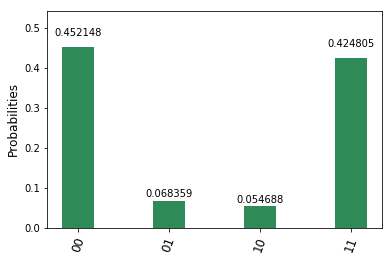

[0.44481713804384776, 0.055182861956152275, 0.055182861956152275, 0.44481713804384776]


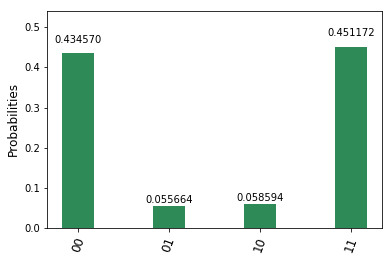

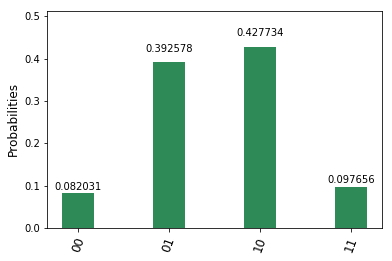

[0.09332746659224414, 0.40667253340775583, 0.40667253340775583, 0.09332746659224414]


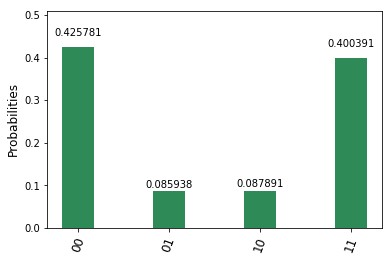

[0.40667253340775583, 0.09332746659224414, 0.09332746659224414, 0.40667253340775583]


In [208]:
#Since XX_Probability=ZZ_Probability we name the function QM_Probability

QM_Probability=[0.5*np.cos(theta/2)**2,0.5*np.sin(theta/2)**2,0.5*np.sin(theta/2)**2,0.5*np.cos(theta/2)**2]

ZX_Probability=[0.25*(np.cos(theta/2)+np.sin(theta/2))**2,
              0.25*(np.cos(theta/2)-np.sin(theta/2))**2,
              0.25*(np.cos(theta/2)-np.sin(theta/2))**2,
              0.25*(np.cos(theta/2)+np.sin(theta/2))**2]

XZ_Probability=[0.25*(np.cos(theta/2)-np.sin(theta/2))**2,
              0.25*(np.cos(theta/2)+np.sin(theta/2))**2,
              0.25*(np.cos(theta/2)+np.sin(theta/2))**2,
              0.25*(np.cos(theta/2)-np.sin(theta/2))**2]

plot_histogram(result.get_counts("bell_measureZZ"))
print(QM_Probability)
plot_histogram(result.get_counts("bell_measureXX"))

plot_histogram(result.get_counts("bell_measureZX"))
print(ZX_Probability)

plot_histogram(result.get_counts("bell_measureXZ"))
print(XZ_Probability)


Since the Entangled quantum state has the form $|\psi\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)= \frac{1}{\sqrt{2}}(|++\rangle+|--\rangle)$

Z-basis outcome | Z (qubit 1) |Z (qubit 2)    || q1&q2 || X (qubit 1)| X (qubit 2) | X-basis outcome  
------------- | -------------  | -------------  | ------------- | ------------- | ------------- 
00  | 1 | 1 || 1 || 1 | 1 | $+ +$ 
01  |-1 | 1 ||-1 ||-1 | 1 | $+ -$ 
10  | 1 |-1 ||-1 || 1 |-1 | $- +$  
11  |-1 |-1 || 1 ||-1 |-1 | $- -$ 

In [209]:
observable_first_ideal ={'00': 1, '01': -1, '10': 1, '11': -1}
observable_second_ideal ={'00': 1, '01': 1, '10': -1, '11': -1}
observable_correlated_ideal ={'00': 1, '01': -1, '10': -1, '11': 1}

In [210]:
print("QM results")

print("theta=",theta)
print("ZZ=",result.get_counts("bell_measureZZ"))
print("XX=",result.get_counts("bell_measureXX"))
print("ZX=",result.get_counts("bell_measureZX"))
print("XZ=",result.get_counts("bell_measureXZ"))

print('IZ = ' + str(result.average_data('bell_measureZZ',observable_first_ideal)))
print('ZI = ' + str(result.average_data('bell_measureZZ',observable_second_ideal)))
print('ZZ = ' + str(result.average_data('bell_measureZZ',observable_correlated_ideal)))

print('IX = ' + str(result.average_data('bell_measureXX',observable_first_ideal)))
print('XI = ' + str(result.average_data('bell_measureXX',observable_second_ideal)))
print('XX = ' + str(result.average_data('bell_measureXX',observable_correlated_ideal)))

print('ZX = ' + str(result.average_data('bell_measureZX',observable_correlated_ideal)))
print('XZ = ' + str(result.average_data('bell_measureXZ',observable_correlated_ideal)))

QM results
theta= 5.60588678888849
ZZ= {'00': 463, '11': 435, '01': 70, '10': 56}
XX= {'00': 445, '11': 462, '01': 57, '10': 60}
ZX= {'10': 438, '01': 402, '00': 84, '11': 100}
XZ= {'00': 436, '11': 410, '10': 90, '01': 88}
IZ = 0.013671875
ZI = 0.041015625
ZZ = 0.75390625
IX = -0.013671875
XI = -0.01953125
XX = 0.771484375
ZX = -0.640625
XZ = 0.65234375


In [211]:
IZ_th=[1,-1, 1,-1];ZI_th=[1, 1,-1,-1];ZZ_th=[+1,-1,-1,+1]
IX_th=[1,-1, 1,-1];XI_th=[1, 1,-1,-1];XX_th=[+1,-1,-1,+1]
ZX_th=[+1,-1,-1,+1];XZ_th=[+1,-1,-1,+1]

print('Probability(A,B) model gives:')
print('IZ_th = ' + str(np.dot(QM_Probability,IZ_th)))
print('ZI_th = ' + str(np.dot(QM_Probability,ZI_th)))
print('ZZ_th = ' + str(np.dot(QM_Probability,ZZ_th)))
print('IX_th = ' + str(np.dot(QM_Probability,IX_th)))
print('XI_th = ' + str(np.dot(QM_Probability,XI_th)))
print('XX_th = ' + str(np.dot(QM_Probability,XX_th)))
print('ZX_th = '  + str(np.dot(ZX_Probability,ZX_th)))
print('XZ_th = '  + str(np.dot(XZ_Probability,XZ_th)))

Probability(A,B) model gives:
IZ_th = 0.0
ZI_th = 0.0
ZZ_th = 0.7792685521753909
IX_th = 0.0
XI_th = 0.0
XX_th = 0.7792685521753909
ZX_th = -0.6266901336310233
XZ_th = 0.6266901336310233


In [212]:
print('QM upper limit is 2*sqrt(2) =', 2*np.sqrt(2))

print('QM CHSH gives ZZ+XX +ZX -XZ =',
    result.average_data('bell_measureZZ',observable_correlated_ideal)
    +result.average_data('bell_measureXX',observable_correlated_ideal)
    +result.average_data('bell_measureZX',observable_correlated_ideal)
    -result.average_data('bell_measureXZ',observable_correlated_ideal))

print('Probability(A,B) model gives=',
    np.dot(QM_Probability,ZZ_th)
    +np.dot(QM_Probability,XX_th)
    +np.dot(ZX_Probability,ZX_th) 
    -np.dot(XZ_Probability,XZ_th))

QM upper limit is 2*sqrt(2) = 2.8284271247461903
QM CHSH gives ZZ+XX +ZX -XZ = 0.232421875
Probability(A,B) model gives= 0.3051568370887352


For any $\theta$, and in particular for $\theta=0$, one can see that the measurements on ZI, IZ, ZZ, XX, IX, XI result in the values as shown in the table below. The mathematical expression of the QM-Probability($\theta$) and the corresponding AB-values above guarantee the expectation values 0 or 1.

However, the zero expectation value for ZX and XZ is not guaranteed for any angle $\theta$. The corresponding probabilities nevertheless guarantee that $\langle ZX \rangle=-\langle XZ \rangle$ because of the functional form of the probability $P(\lambda,\theta_{AB})$  and the associated AB-outcomes.  

Observable    | Expected value |Observable    | Expected value|Observable    | Expected value
------------- | -------------  | ------------- | ------------- | ------------- | -------------
ZZ  | 1   |XX  | 1  | ZX  | 0 ? 
ZI  | 0   |XI  | 0  | XZ  | 0 ?
IZ  | 0   |IX  | 0  |   |

Next, let's introduce the concept of a *$\theta$ hidden variable model*. 
If we assume there are hidden variables $\lambda$ and $\theta$ that defines all the correlations so that:

$$\langle A\otimes B\rangle = \sum_\lambda P(\lambda,\theta_{AB}) A(\lambda) B(\lambda).$$ 
                      
while ($A(\lambda)=\pm1$ etc.). 

Then how well can we describe these observations? --- The answer is very well! 

Thus, with the *$\theta$ hidden variable model*, we are able to reconcile the measured observations for this particular Entangled states. 

For this purpose, we define the $P(\lambda,\theta_{AB})$ function below, as well as a simulator and real 2q-bit circuits. In the end, we will compare all the results.

In [192]:
#VGG since XXP is the same as ZZP we define them both as QMP.

QMP = lambda x : np.array([0.5*np.cos(x/2)**2, 0.5*np.sin(x/2)**2, 0.5*np.sin(x/2)**2, 0.5*np.cos(x/2)**2]);

ZXP = lambda x : np.array([0.25*(np.cos(x/2)+np.sin(x/2))**2, 
                     0.25*(np.cos(x/2)-np.sin(x/2))**2,
                     0.25*(np.cos(x/2)-np.sin(x/2))**2,
                     0.25*(np.cos(x/2)+np.sin(x/2))**2]);

XZP = lambda x : np.array([0.25*(np.cos(x/2)-np.sin(x/2))**2, 
                     0.25*(np.cos(x/2)+np.sin(x/2))**2,
                     0.25*(np.cos(x/2)+np.sin(x/2))**2,
                     0.25*(np.cos(x/2)-np.sin(x/2))**2]);

ZZXXZX_XZP = lambda x : 2*QMP(x)+ZXP(x)-XZP(x);


ZZXXZX_XZ_value =  lambda x : np.dot(ZZXXZX_XZP(x),[1,-1,-1,1]);


In [193]:
CHSH = lambda x : x[0]+x[1]+x[2]-x[3]

In [196]:
backend = 'local_qasm_simulator'
shots = 2*1024 #VGG it was 8x more

program = []
xdata=[]

ydata=[]

program_end = [measureZZ, measureZX, measureXX, measureXZ]

k = 0
for jj in range(0,30):
    theta = 2.0*np.pi*jj/30
    bell_middle = QuantumCircuit(q,c)
    bell_middle.ry(theta,q[0])
    for i in range(4):
        program.append('circuit'+str(k))
        Q_program.add_circuit('circuit'+str(k), bell+bell_middle+program_end[i] )
        k += 1
        
    xdata.append(theta)
    ydata.append(ZZXXZX_XZ_value(theta))

In [197]:
Q_program.get_qasms(program[0:8])

['OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.0) q[0];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.0) q[0];\nh q[0];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.0) q[0];\nh q[0];\nh q[1];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.0) q[0];\nh q[1];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.209439510239320) q[0];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.2094395

In [198]:
results = Q_program.execute(program, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240)

In [199]:
CHSH_data_sim = []
k = 0
for j in range(len(xdata)):
    temp=[]
    for i in range(4): 
        temp.append(results.average_data('circuit'+str(k),observable_correlated_ideal))
        k += 1
    CHSH_data_sim.append(CHSH(temp))

In [200]:
backend = 'ibmqx2'
# backend = 'local_qasm_simulator'

shots = 1024

program_real = []
xdata_real=[]

k = 0
for jj in range(10):
    theta = 2.0*np.pi*jj/10
    bell_middle = QuantumCircuit(q,c)
    bell_middle.ry(theta,q[0])
    for i in range(4):
        program_real.append('circuit_real'+str(k))
        Q_program.add_circuit('circuit_real'+str(k), bell+bell_middle+program_end[i] )
        k += 1
        
    xdata_real.append(theta)

In [201]:
Q_program.get_qasms(program_real[0:8])

['OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.0) q[0];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.0) q[0];\nh q[0];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.0) q[0];\nh q[0];\nh q[1];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.0) q[0];\nh q[1];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.628318530717959) q[0];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nry(0.0) q[0];\nry(0.6283185

In [202]:
resultreal = Q_program.execute(program_real, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240)

In [203]:
CHSH_data_real = []
k = 0
for j in range(len(xdata_real)):
    temp=[]
    for i in range(4): 
        temp.append(resultreal.average_data('circuit_real'+str(k),observable_correlated_ideal))
        k += 1
    CHSH_data_real.append(CHSH(temp))

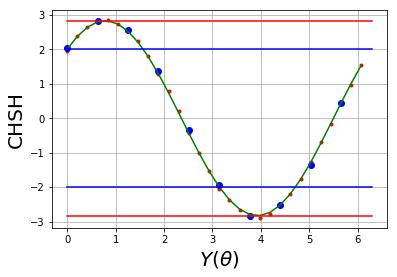

In [204]:
plt.plot(xdata,CHSH_data_sim,'bo', xdata_real,CHSH_data_real,'r*', xdata,ydata,'g-')
plt.plot([0, 2*np.pi], [2, 2], 'b-')
plt.plot([0, 2*np.pi], [-2, -2], 'b-')
plt.plot([0, 2*np.pi], [2*np.sqrt(2), 2*np.sqrt(2)], 'r-')
plt.plot([0, 2*np.pi], [-2*np.sqrt(2), -2*np.sqrt(2)], 'r-')
plt.grid()
plt.ylabel('CHSH', fontsize=20)
plt.xlabel(r'$Y(\theta)$', fontsize=20)
plt.show()

## CHSH Graph <a id='section5'></a>

The resulting graph above created by running the previous cell compares the *$\theta$ hidden variable model* (sinusoidal green line),  simulated data (blue circles), and the data from the real experiment (red stars). The graph also gives lines for the limits at $\pm 2$ (blue) and $\pm 2\sqrt{2}$ (red) for reference.

Here is the saved CHSH data. 

In [213]:
print(CHSH_data_real)

[2.048828125, 2.806640625, 2.544921875, 1.357421875, -0.3515625, -1.9296875, -2.84765625, -2.533203125, -1.345703125, 0.443359375]


One can see that this experiment is compatible with quantum mechanics as well as with *$\theta$ hidden variable* model above. 

See the original experimental demonstrations of this test with superconducting qubits [here](https://arstechnica.com/science/2017/05/quantum-volume-one-number-to-benchmark-a-quantum-computer/) and [here](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.81.062325).

## Closing Remarks <a id='section6'></a>

Since the function $P(\lambda,\theta_{AB})$ was deduced based on the QM consideration, thus this is not purely classical object. However, one can consider an experimental determination of $P(\lambda,\theta_{AB})$ instead. 
In any case, $P(\lambda,\theta_{AB})$ is not quite like the usual probability distributions because: 

$$\sum_{\lambda \in outcome_{AB}} P(\lambda,\theta_{AB})=4$$

One can easily see this by considering that $2*QM_{-}Probability(\theta)+ZX_{-}Probability(\theta)+XZ_{-}Probability(\theta)$
results in the following expressions $[1+\cos(\theta)/2,1-\cos(\theta)/2,1-\cos(\theta)/2,1+\cos(\theta)/2]$ along the ordered list of outcomes  $[00,01,10,11]$. In summary, we have the following table:

ZZ-basis| XX-basis  |ZX-basis |XZ-basis| AB-outcome |$P(\theta_{AB})$
------------- | -------------  | -------------  | ------------- | ------------- 
$0 0$|$+ +$|$0 +$|$+ 0$|$1$|$1+\cos(\theta)/2$
$0 1$|$+ -$|$0 -$|$+ 1$|$-1$|$1-\cos(\theta)/2$ 
$1 0$|$- +$|$1 +$|$- 0$|$-1$|$1-\cos(\theta)/2$  
$1 1$|$- -$|$1 -$|$- 1$|$1$|$1+\cos(\theta)/2$  


This explains the total value of 4 for the earlier sum to be due to summation over four different complete probabilities:

$$ZX_{-}Probability(\theta),\qquad XZ_{-}Probability(\theta),\qquad XX_{-}Probability(\theta)=ZZ_{-}Probability(\theta)=QM_{-}Probability(\theta)$$

One can easily verify that these are really well-normalized probabilities: 
$$\sum_{\lambda \in columm} QM_{-}Probability(\theta)
=\sum_{\lambda \in columm} ZX_{-}Probability(\theta)
=\sum_{\lambda \in columm} XZ_{-}Probability(\theta)=1.$$
